# 1) Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_info_clients = pd.read_csv('data/clien_info_right.csv')
df_info_clients.drop(['Unnamed: 0'], axis=1, inplace=True)
df_info_clients.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-09-07,...,1,credit_card,2,529.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2022-10-28,...,1,credit_card,1,230.34,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2020-08-27,...,1,credit_card,1,674.78,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2019-12-04,...,1,credit_card,7,256.89,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2019-09-20,...,1,credit_card,10,275.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


## 1.1) Translating the dataframe

- **Amostra:**  id

- **id_cliente:** client_id

- **id_unico_cliente:**: client_specific_id

- **item-id:** item_id

- **cep_cliente:** client _postal_code

- **cidade cliente:** client_city

- **estado_cliente:** client_state

- **id_pedido:** order_id

- **status_pedido:** order_status

- **horario pedido:** order_date

- **pedido_aprovado:** order_approved (date and time that the order was approved)

- **pedido_entregador:** order_dliveryman (date and time that the order was leaving for delivery)

- **pedido_entregue:** order_delivery (date and time that the order was delivery to the client)

- **data_estimada:** order_estimated (estimate date that the order will arrive to the client)

- **id_vendedor:** salesman_id

- **preco:** order_price (price of the order in reais (R$))

- **frete:** delivery_price

- **pagamento_sequencial:** sequence_pay

- **pagamento_tipo:** paymeny_type

- **pagamento_prestacoes:**  divided_pay (number of parcels that the client will pay the order's value)

- **pagamento_valor:** ntotal_price (order's price + dlivery's price)

- **review:** review (stars rating of the client)

- **categoria:** category (product's category)

- **categoria_ingles:** category_english (product's category in english)

- **cep_vendedor:** salesman_postal

- **cidade_vendedor:** salesman_city

- **estado_vendedor:** salesman_state

In [3]:
#Rename the columns
new_columns = [ 'id',  'client_id', 'client_specific_id', 'item_id', 'client _postal_code', 'client_city', 'client_state', 'order_id', 'order_status', 'order_date', 'order_approved', 'order_dliveryman',
               'order_delivery', 'order_estimated', 'salesman_id', 'order_price', 'delivery_price', 'sequence_pay', 'paymeny_type', 'divided_pay', 'total_price', 'review', 'category', 'category_english',
               'salesman_postal', 'salesman_city', 'salesman_state']

df_info_clients.columns = new_columns

In [4]:
df_info_clients.head()

,id,client_id,client_specific_id,item_id,client _postal_code,client_city,client_state,order_id,order_status,order_date,...,sequence_pay,paymeny_type,divided_pay,total_price,review,category,category_english,salesman_postal,salesman_city,salesman_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-09-07,...,1,credit_card,2,529.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2022-10-28,...,1,credit_card,1,230.34,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2020-08-27,...,1,credit_card,1,674.78,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2019-12-04,...,1,credit_card,7,256.89,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2019-09-20,...,1,credit_card,10,275.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


# 2) Data Caracteristics

In [5]:
print('Number of Rows: {}'.format( df_info_clients.shape[0] ) )
print( 'Number of Columns: {}'.format( df_info_clients.shape[1] ) )

Number of Rows: 116581
Number of Columns: 27


In [6]:
#type of the columns
print('Data Types')
df_info_clients.dtypes

Data Types


id                       int64
client_id               object
client_specific_id      object
item_id                  int64
client _postal_code      int64
client_city             object
client_state            object
order_id                object
order_status            object
order_date              object
order_approved          object
order_dliveryman        object
order_delivery          object
order_estimated         object
salesman_id             object
order_price            float64
delivery_price         float64
sequence_pay             int64
paymeny_type            object
divided_pay              int64
total_price            float64
review                   int64
category                object
category_english        object
salesman_postal          int64
salesman_city           object
salesman_state          object
dtype: object

In [7]:
# Convert datas from object to date_time
df_info_clients[["order_date"]] = df_info_clients[["order_date"]].apply(pd.to_datetime)
df_info_clients[["order_approved"]] = df_info_clients[["order_approved"]].apply(pd.to_datetime)
df_info_clients[["order_dliveryman"]] = df_info_clients[["order_dliveryman"]].apply(pd.to_datetime)
df_info_clients[["order_delivery"]] = df_info_clients[["order_delivery"]].apply(pd.to_datetime)
df_info_clients[["order_estimated"]] = df_info_clients[["order_estimated"]].apply(pd.to_datetime)

In [8]:
print("Check Null Values")
df_info_clients.isna().sum()

Check Null Values


id                     0
client_id              0
client_specific_id     0
item_id                0
client _postal_code    0
client_city            0
client_state           0
order_id               0
order_status           0
order_date             0
order_approved         0
order_dliveryman       0
order_delivery         0
order_estimated        0
salesman_id            0
order_price            0
delivery_price         0
sequence_pay           0
paymeny_type           0
divided_pay            0
total_price            0
review                 0
category               0
category_english       0
salesman_postal        0
salesman_city          0
salesman_state         0
dtype: int64

In [9]:
print("There are "+ str(len(df_info_clients)) + " sales and " +
    str(len(df_info_clients['client_id'].unique())) + 
    " different clients " )

There are 116581 sales and 97255 different clients 


As this is a small percentage, the shop should create more attractive condidtions to estimulates clients to buy a second time

In [10]:
#Clients that bought more than once
counts = df_info_clients['client_id'].value_counts()
id_good_clients = counts[counts>1].index.tolist()

In [11]:
#Clients that bought more than once
counts = df_info_clients['client_id'].value_counts()
id_good_clients = counts[counts>1].index.tolist()

print( str(len(id_good_clients)) +
    " clients bought more than once, which represents " +
    str(round(((len(id_good_clients)/len(df_info_clients['client_id'].unique()))*100),2)) +
    "%")


12729 clients bought more than once, which represents 13.09%


In [12]:
#separate the dataframe for only good clients
df_good_clients = df_info_clients[df_info_clients['client_id'].isin(id_good_clients)]

print("The clients that bought more than once represents " +
str(round((df_good_clients['order_price'].sum()/df_info_clients['order_price'].sum())*100,2))+
"% of the revenue")

The clients that bought more than once represents 27.5% of the revenue


# 3) Creating Clients' Features

I will create a dataframe of clients with the following features:
- Client ID
- Client State
- Client city 
- Number of orders
- Mean of the price of the order
- Sum of the price: total price of all the orders combine
- Mean of the reviews
- First order date
- Last order date
- Difference between the first and last order date
- Interval: number of days between purchases

In [13]:
df_info_clients['order_date2'] = df_info_clients['order_date'] 
df_info_clients['order_price2'] = df_info_clients['order_price'] 
df_clients = df_info_clients.groupby(['client_id', 'client_state', 'client_city']).agg(
    {'client_id': 'count', 'order_price': 'mean', 'order_price2': 'sum', 'review': 'mean', 'order_date': 'min', 'order_date2': 'max'}).rename(
    columns={'client_id': 'number_orders', 'order_price': 'mean_price', 'order_price2': 'sum_price', 'review': 'mean_review', 'order_date': 'min_order_date', 'order_date2': 'max_order_date'}).reset_index()
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date
0,00012a2ce6f8dcda20d059ce98491703,SP,osasco,1,784.72,784.72,1.0,2022-10-04,2022-10-04
1,000161a058600d5901f007fab4c27140,MG,itapecerica,1,930.15,930.15,4.0,2020-07-10,2020-07-10
2,0001fd6190edaaf884bcaf3d49edf079,ES,nova venecia,1,889.38,889.38,5.0,2019-07-22,2019-07-22
3,0002414f95344307404f0ace7a26f1d5,MG,mendonca,1,948.16,948.16,5.0,2019-06-30,2019-06-30
4,000379cdec625522490c315e70c7a9fb,SP,sao paulo,1,782.85,782.85,4.0,2022-06-05,2022-06-05


In [14]:
df_clients['max_order_date'] = pd.to_datetime(df_clients['max_order_date'])
df_clients['min_order_date'] = pd.to_datetime(df_clients['min_order_date'])

In [15]:
#Calculate the number of days between first and the last order
df_clients['diff_days'] = (df_clients['max_order_date'] - df_clients['min_order_date']).dt.days

#Calculate the number of days between purchases
df_clients['interval'] = round(df_clients['diff_days'] / df_clients['number_orders'],2)

#Calculate the number of days since the last pruchase
df_clients['recency'] = max(df_info_clients['order_delivery'])
df_clients['recency'] = pd.to_datetime(df_clients['recency'])
df_clients['recency'] = (df_clients['recency'] - df_clients['max_order_date']).dt.days

#Sorting the dataframe in descendant order by the the total spent per client
df_clients = df_clients.sort_values(by='sum_price', ascending=False).reset_index()
df_clients.drop(['index'], axis=1, inplace=True)

In [16]:
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval,recency
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84,88
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05,116
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31,86
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17,217
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76,112


# 4) Clients' Exploratory Data Analysis

### 4.1) Helper Functions

In [17]:
def statistics_features (col1, df):
    x_mean = df[col1].mean()
    x_median = df[col1].median()
    x_std = df[col1].std()
    x_min = df[col1].min()
    x_max = df[col1].max()

    
    x_stats = pd.DataFrame({'mean': [x_mean],
                            'median': [x_median],
                            'std': [x_std],
                            'min': [x_min],
                            'max': [x_max]})
    x_stats.index = [col1]
    return x_stats

### 4.2) Feature: sum_price 

sum_price statistics
                 mean  median         std  min       max
sum_price  659.164129  610.79  540.080369  1.0  34558.23


<Axes: xlabel='sum_price', ylabel='Count'>

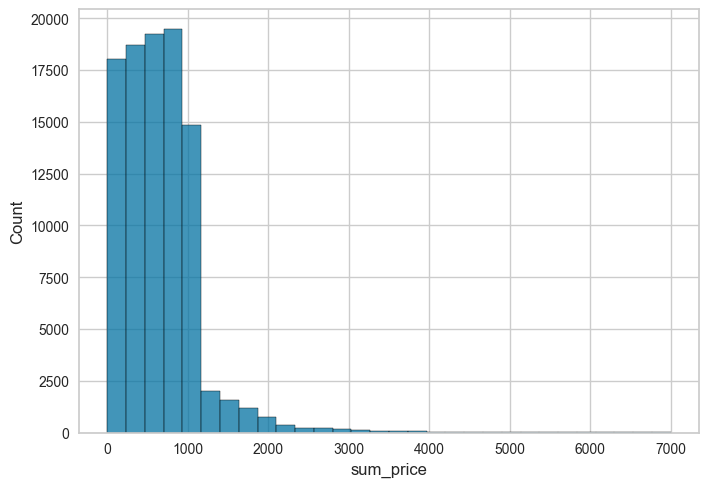

In [18]:
print("sum_price statistics")
print(statistics_features('sum_price', df_clients))
#Histogram of the total spent of the clients, including all the orders
sns.histplot(df_clients['sum_price'], bins = 30, binrange = (0,7000))

### 4.3) Feature: number_orders

number_orders statistics
                   mean  median      std  min  max
number_orders  1.198715     1.0  0.75133    1   63


<Axes: xlabel='number_orders', ylabel='Count'>

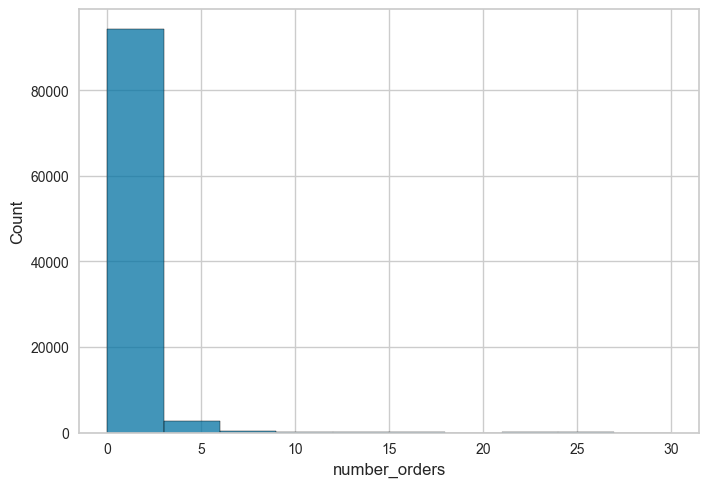

In [19]:
print("number_orders statistics")
print(statistics_features('number_orders', df_clients))
sns.histplot(df_clients['number_orders'], bins = 10, binrange = (0,30))

### 4.4) Feature: mean_review

review statistics
                 mean  median       std  min  max
mean_review  4.092385     5.0  1.340172  1.0  5.0


<Axes: xlabel='mean_review', ylabel='Count'>

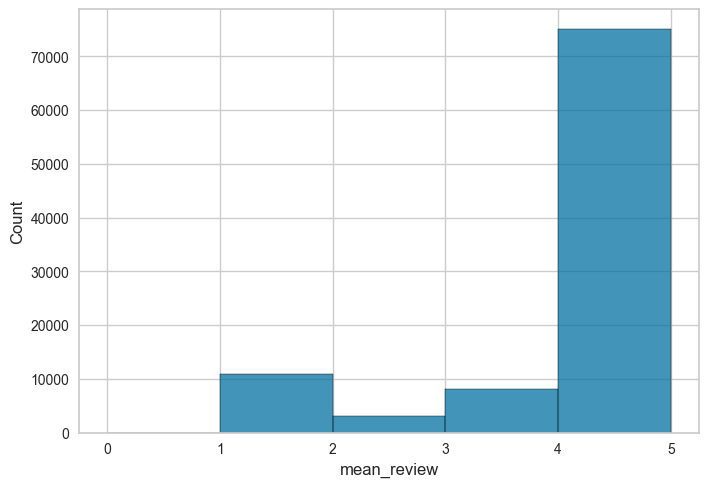

In [20]:
print("review statistics")
print(statistics_features('mean_review', df_clients))
sns.histplot(df_clients['mean_review'], bins = 5, binrange = (0,5))

### 4.5) Feature: recency

Recency statistics
               mean  median         std  min   max
recency  774.037941   757.0  423.109463   82  1542


<Axes: xlabel='recency', ylabel='Count'>

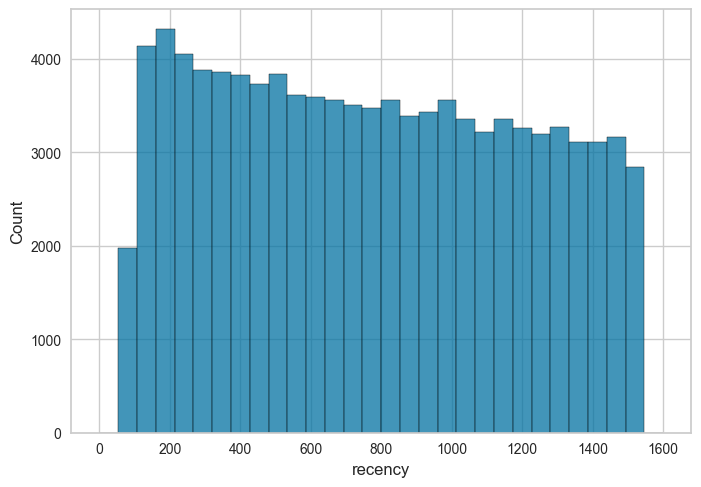

In [21]:
print("Recency statistics")
print(statistics_features('recency', df_clients))
sns.histplot(df_clients['recency'], bins = 30, binrange = (0,1600))

### 4.5) Feature: State

In [22]:
df_clients['client_state'].value_counts(normalize=True).head()

SP    0.419516
RJ    0.129238
MG    0.116961
RS    0.055020
PR    0.050671
Name: client_state, dtype: float64

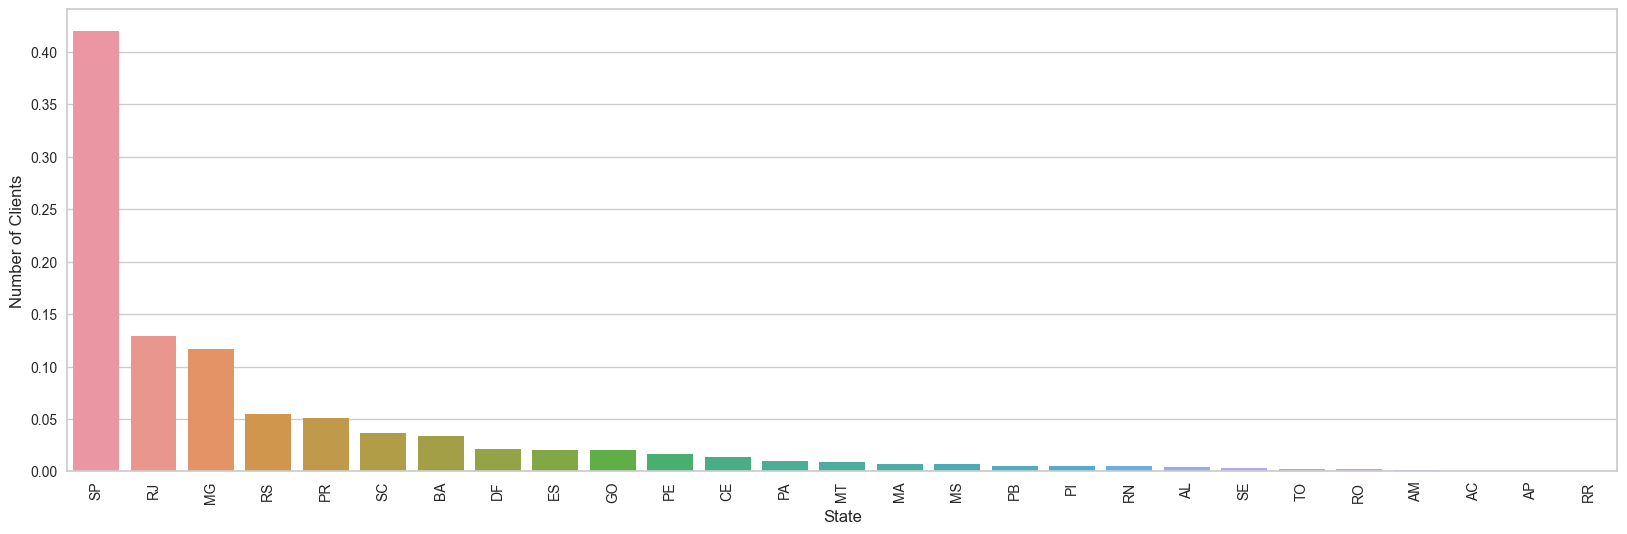

In [23]:
plt.figure(figsize=(20, 6))

#Create an aux dataframe
aux = df_clients['client_state'].value_counts(normalize=True).sort_values(ascending=False)

# create bar plot of sorted state counts with seaborn
sns.barplot(x=aux.index, y=aux.values)

# set axis labels and rotate x-axis labels
plt.xlabel('State')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)

# display plot
plt.show()

The southeeast region of Brasil is the most represetantive.
The Southeast correspond to the following states: 
- São Paulo (SP)
- Rio de Janeiro (RJ)
- Minas Gerais (MG)
- Espírito Santo (ES)

In [24]:
df_SE = df_clients[(df_clients['client_state'] == 'SP') | 
            (df_clients['client_state'] == 'RJ') | 
            (df_clients['client_state'] == 'MG')| 
            (df_clients['client_state'] == 'ES')] 

print('The Southeast represents ' + 
      str(round(len(df_SE)/len(df_clients),4)*100) + 
      '% of the total orders')

print('The Southeast represent ' + 
      str(round(df_SE['sum_price'].sum()/df_clients['sum_price'].sum(),2)*100) + 
      '% of the clients total spent ')

The Southeast represents 68.64% of the total orders
The Southeast represent 69.0% of the clients total spent 


#### The enconding:
- Client that is located in the southeast = 1
- thoso who are not = 0.

In [25]:
#Create a colum to indentify if the client is from the southeast or not
df_clients['is_southeast']=0
df_clients.loc[(df_clients['client_state'] == 'SP') | (df_clients['client_state'] == 'RJ') | (df_clients['client_state'] == 'MG') | (df_clients['client_state'] == 'ES'), 'is_southeast'] = 1


### 4.6) Feature: City

In [26]:
df_clients['client_city'].value_counts(normalize=True).head()

sao paulo         0.155827
rio de janeiro    0.069138
belo horizonte    0.027772
brasilia          0.021449
curitiba          0.015372
Name: client_city, dtype: float64

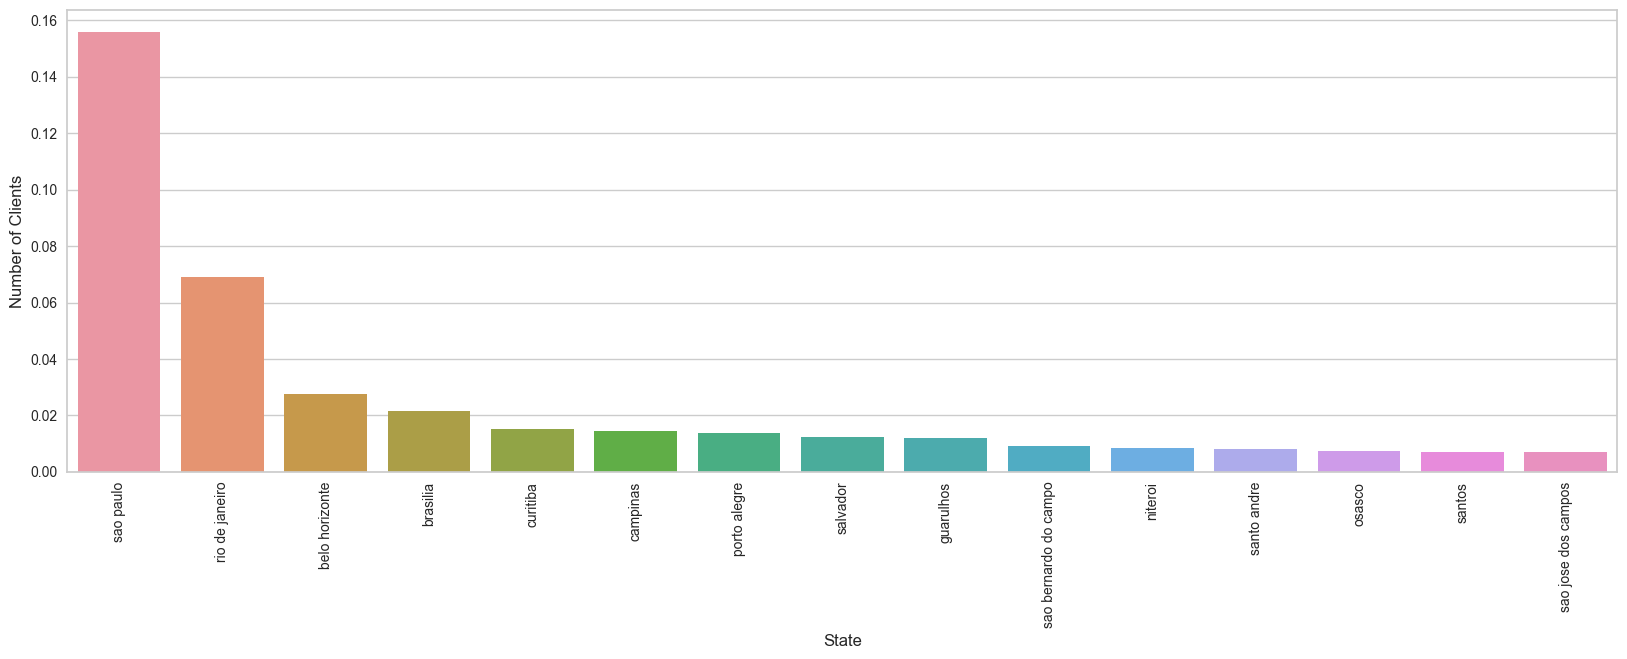

In [27]:
plt.figure(figsize=(20, 6))

#Create an aux dataframe
aux = df_clients['client_city'].value_counts(normalize=True).sort_values(ascending=False).head(15)

# create bar plot of sorted state counts with seaborn
sns.barplot(x=aux.index, y=aux.values)

# set axis labels and rotate x-axis labels
plt.xlabel('State')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)

# display plot
plt.show()

# 5) Bivariate Analysis

### number_orders: 
We will correlante this feature with: 
- number_orders and mean_price
- number_orders and sum_price
- number_orders and interval
- number_orders and recency

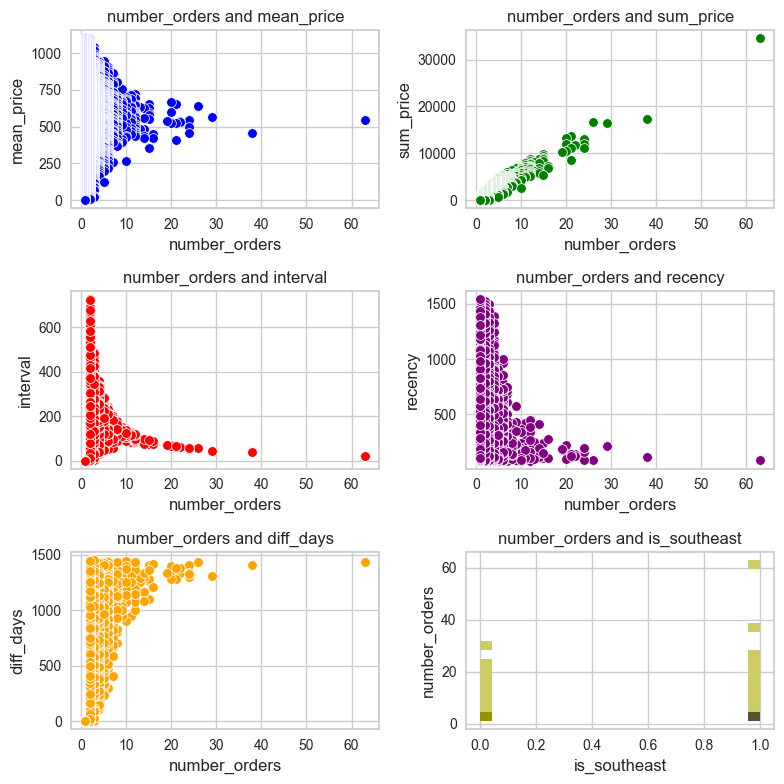

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

sns.scatterplot(x="number_orders", y="mean_price", data=df_clients, color="blue", ax=axes[0, 0])
axes[0, 0].set_title('number_orders and mean_price')

sns.scatterplot(x="number_orders", y="sum_price", data=df_clients, color="green", ax=axes[0, 1])
axes[0, 1].set_title('number_orders and sum_price')

sns.scatterplot(x="number_orders", y="interval", data=df_clients, color="red", ax=axes[1, 0])
axes[1, 0].set_title('number_orders and interval')

sns.scatterplot(x="number_orders", y="recency", data=df_clients, color="purple", ax=axes[1, 1])
axes[1, 1].set_title('number_orders and recency')

sns.scatterplot(x="number_orders", y="diff_days", data=df_clients, color="orange", ax=axes[2, 0])
axes[2, 0].set_title('number_orders and diff_days')

sns.histplot(x="is_southeast", y="number_orders", data=df_clients, color="yellow", ax=axes[2, 1])
axes[2, 1].set_title('number_orders and is_southeast')

fig.tight_layout()
plt.show()

### mean_price: 
We will correlante this feature with: 
- sum_price and mean_price
- mean_price and interval
- mean_price and recency

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(x="sum_price", y="mean_price", data=df_clients, color="blue", ax=axes[0])
axes[0].set_title('sum_price and mean_price')

sns.scatterplot(x="mean_price", y="interval", data=df_clients, color="green", ax=axes[1])
axes[1].set_title('mean_price and interval')

sns.scatterplot(x="mean_price", y="recency", data=df_clients, color="red", ax=axes[2])
axes[2].set_title('mean_price and interval')

fig.tight_layout()
plt.show()

# 6) The outliers 

The positive outliers will be the most important clients
The number of orders and mean price will be considered the highest of the classifications: premium clients

                   mean  median      std  min  max
number_orders  1.198715     1.0  0.75133    1   63


<Axes: xlabel='number_orders', ylabel='Count'>

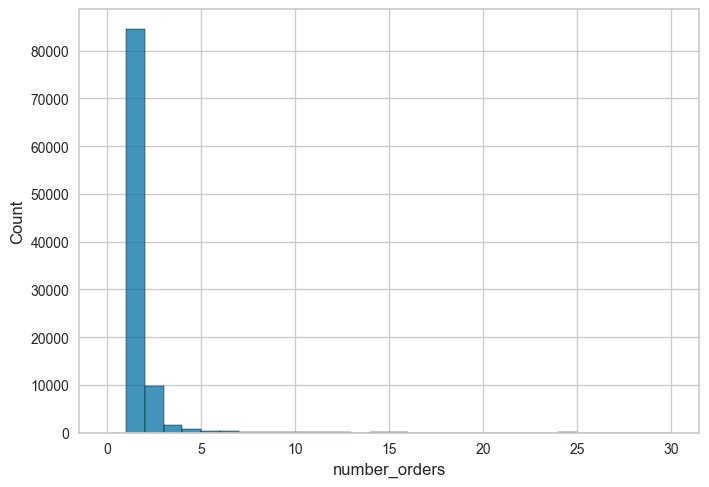

In [29]:
print(statistics_features('number_orders', df_clients))
sns.histplot(df_clients['number_orders'], bins = 30, binrange = (0,30))

                  mean  median         std  min      max
mean_price  549.725586  549.43  305.204476  1.0  1099.97


<Axes: xlabel='mean_price', ylabel='Count'>

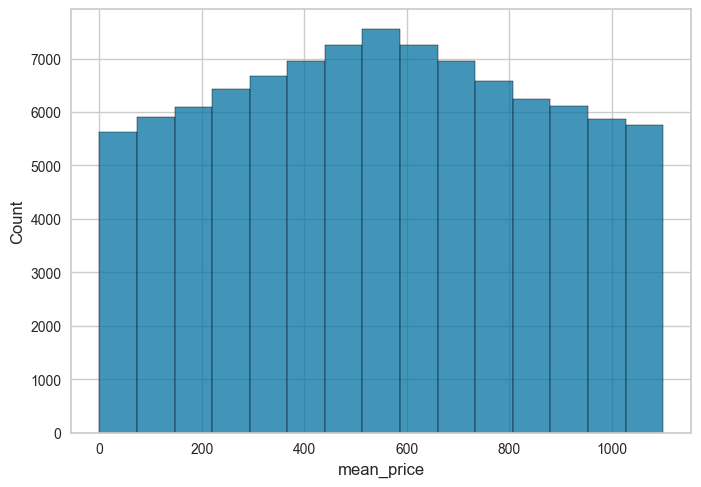

In [30]:
print(statistics_features('mean_price', df_clients))
sns.histplot(df_clients['mean_price'], bins = 15, binrange = (0,max(df_clients['mean_price'])))

               mean  median         std  min   max
recency  774.037941   757.0  423.109463   82  1542


<Axes: xlabel='recency', ylabel='Count'>

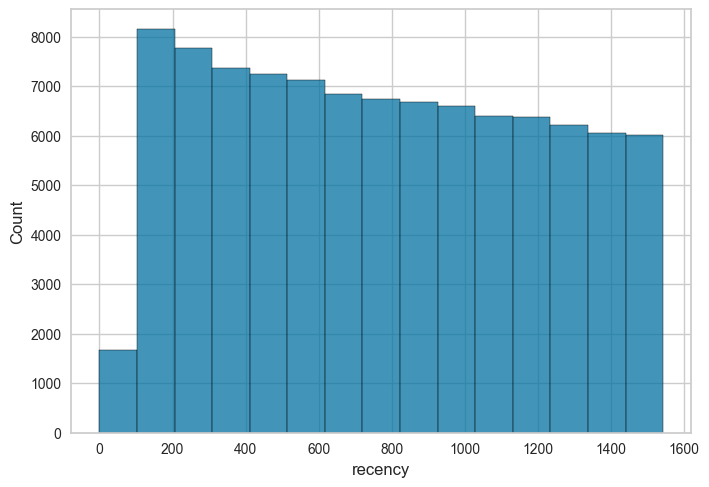

In [31]:
print(statistics_features('recency', df_clients))
sns.histplot(df_clients['recency'], bins = 15, binrange = (0,max(df_clients['recency'])))

- positive outliers = mean + 2*std 

In [32]:
premium_number_orders = round(df_clients['number_orders'].mean()+ 2*df_clients['number_orders'].std())
premium_mean_prices = round(df_clients['mean_price'].mean()+ 2*df_clients['mean_price'].std(),2)

print("PREMIUM Clients should have:")
print("- the number of orders bigger than "+ str(premium_number_orders)+" or")
print("- the mean price of the client's spents has to be higher than R$"+ str(premium_mean_prices))

PREMIUM Clients should have:
- the number of orders bigger than 3 or
- the mean price of the client's spents has to be higher than R$1160.13


In [33]:
df_premium = df_clients[(df_clients['number_orders'] > premium_number_orders) | (df_clients['mean_price'] > premium_mean_prices)]
print(str(len(df_premium))+" clients are premium, which represents only "+ str(round(len(df_premium)/len(df_clients),2)) + "% of the total clients")

1515 clients are premium, which represents only 0.02% of the total clients


Now, we will remove these outliers from our main data set to analyse which one are the most important features

In [34]:
df_clients = df_clients[(df_clients['number_orders'] <= premium_number_orders) & (df_clients['mean_price'] <= premium_mean_prices)]

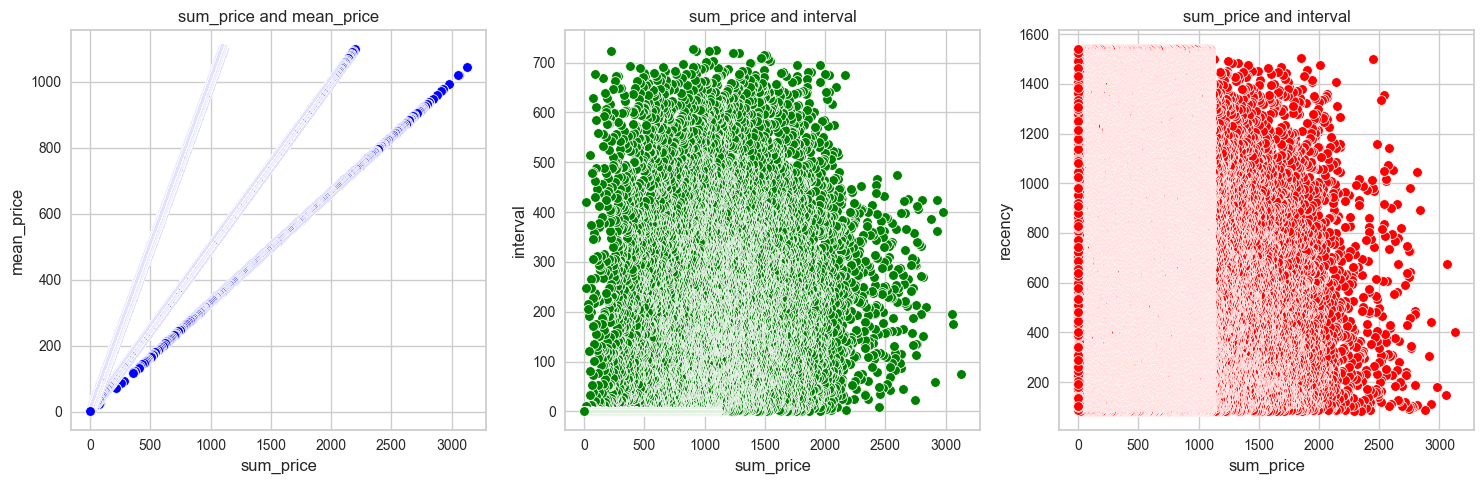

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(x="sum_price", y="mean_price", data=df_clients, color="blue", ax=axes[0])
axes[0].set_title('sum_price and mean_price')

sns.scatterplot(x="sum_price", y="interval", data=df_clients, color="green", ax=axes[1])
axes[1].set_title('sum_price and interval')

sns.scatterplot(x="sum_price", y="recency", data=df_clients, color="red", ax=axes[2])
axes[2].set_title('sum_price and interval')

fig.tight_layout()
plt.show()

# 7) Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In this case we are going to use min max, because we have a non-gaussian distribution and we are going to fit them in a range between [0,1]

In [36]:
df_normalized = df_clients.iloc[:,[3,4,5,6,10,11,12]]

In [37]:
df_normalized.head()

,number_orders,mean_price,sum_price,mean_review,interval,recency,is_southeast
472,3,1043.330000,3129.99,3.0,74.67,402,0
508,3,1021.343333,3064.03,5.0,174.33,674,1
511,3,1018.976667,3056.93,5.0,195.00,149,0
541,3,993.710000,2981.13,5.0,399.33,179,1
576,3,977.420000,2932.26,1.0,361.33,440,0


In [38]:
df_normalized.iloc[:,0] =   MinMaxScaler().fit_transform(np.array(df_normalized.iloc[:,0]).reshape(-1, 1))
df_normalized.iloc[:,1] =   MinMaxScaler().fit_transform(np.array(df_normalized.iloc[:,1]).reshape(-1, 1))
df_normalized.iloc[:,2] =   MinMaxScaler().fit_transform(np.array(df_normalized.iloc[:,2]).reshape(-1, 1))
df_normalized.iloc[:,3] =   MinMaxScaler().fit_transform(np.array(df_normalized.iloc[:,3]).reshape(-1, 1))
df_normalized.iloc[:,4] =   MinMaxScaler().fit_transform(np.array(df_normalized.iloc[:,4]).reshape(-1, 1))
df_normalized.iloc[:,5] =   MinMaxScaler().fit_transform(np.array(df_normalized.iloc[:,5]).reshape(-1, 1))
df_normalized.iloc[:,6] =   MinMaxScaler().fit_transform(np.array(df_normalized.iloc[:,6]).reshape(-1, 1))


# 8) Principal Component Analysis (PCA)

To defyne the most importanta features, we need to see the correlation between the variables. 

We have 7 numerical features:
- number_orders (col3)
- mean_price (col4)
- sum_price (col5)
- mean_review (col6)
- interval (col10)
- recency (col11)
- is_southeast (col12)

In [39]:
X = df_normalized.iloc[:,[0,1,2,3,4,5]]

# Instantiate the PCA object with 4 main components
pca = PCA(n_components=3)

pca.fit(X)
X = pca.transform(X)

df_pca = pd. DataFrame (X, columns= ['pc1', 'pc2', 'pc3'])

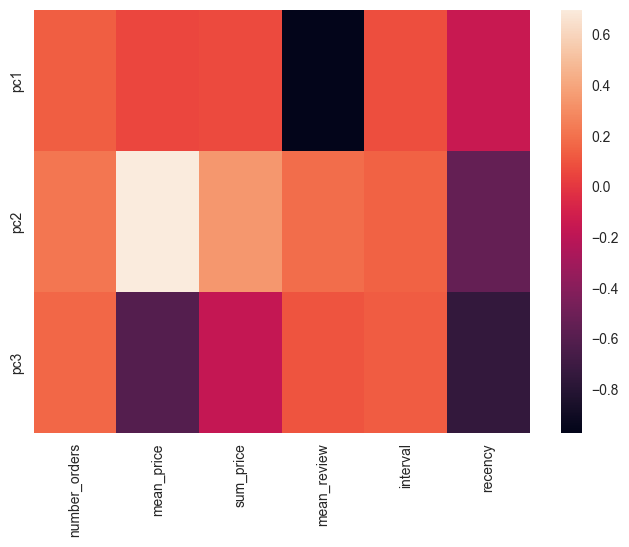

In [40]:
component_df=pd.DataFrame(pca.components_,index=['pc1', 'pc2', 'pc3'],columns=df_normalized.iloc[:,[0,1,2,3,4,5]].columns)
# Heat map
sns.heatmap(component_df)
plt.show()

In [41]:
component_df

,number_orders,mean_price,sum_price,mean_review,interval,recency
pc1,0.135851,0.055589,0.068741,-0.972583,0.082083,-0.145169
pc2,0.219798,0.696692,0.339914,0.187914,0.148156,-0.541762
pc3,0.163457,-0.602314,-0.169362,0.098438,0.126779,-0.745690


We can see that the main components are:
- pc1: recency
- pc2: number of orders
- pc3: mean price

Os componentes mais importantes sao sum_price e recency.. pc1 e pc2 apresentam os dois como mais importantes e eles sao quase ortogonais

# 9) Machine Learning Algorithms

## 9.1) K-means

Algorithm behind K-Means
- Cluster the data into k groups where the value of k is predefined.
- At random, select total k points which may/may not be from the dataset which would be known as the cluster centers or centroids.
- Assign the data points to their closest centroids based on any distance function. This step is called the Expectation step.
- Calculate the center point/ mean of each clusters again and replace it as the centroid point. This is the Maximisation step.
- Repeat the Expectation-Maximisation steps until either no data points move from their previous clusters, or centroid does not change from the previous iteration.

In order to decide how many clusters you want that can be decided by the elbow method.





In [42]:
X = df_normalized.iloc[:,[1,4,5]].values

### 9.1.1)The Elbow Method

The elbow method allow us to defyne optimal number of clusters\


In order to do this, it defines clusters such that the  total within-cluster sum of square (WCSS) is minimized. The Elbow method looks at the total WCSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WCSS.


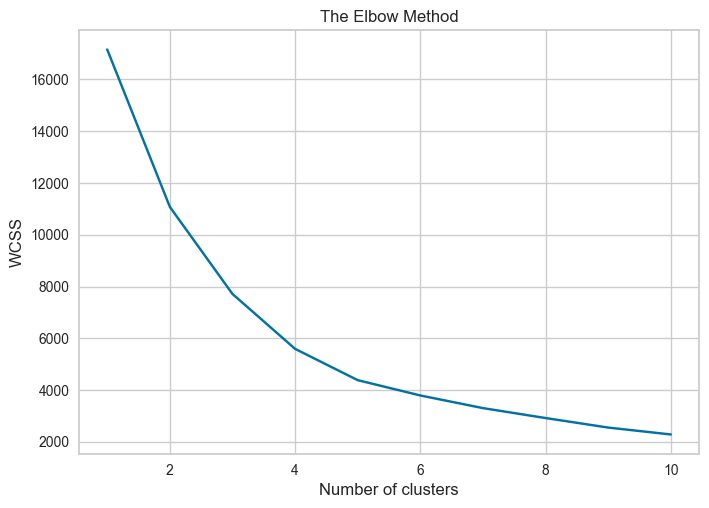

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

But how can we identify whether the best number of clusters is 4, 5, or 6? First, we define a line connecting the first point (cluster 1) to the last point (cluster 9). Then, we calculate the distance of each point to the line using the following equation:

![alt text](images/distance-equation.png)

In [44]:
def number_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        distances.append(abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)/math.sqrt((y2 - y1)**2 + (x2 - x1)**2))
    
    return distances.index(max(distances))

In [45]:
n_cluters = number_clusters(wcss)
print("The opitmal number of clusters is "+str(n_cluters))

The opitmal number of clusters is 4


In [46]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

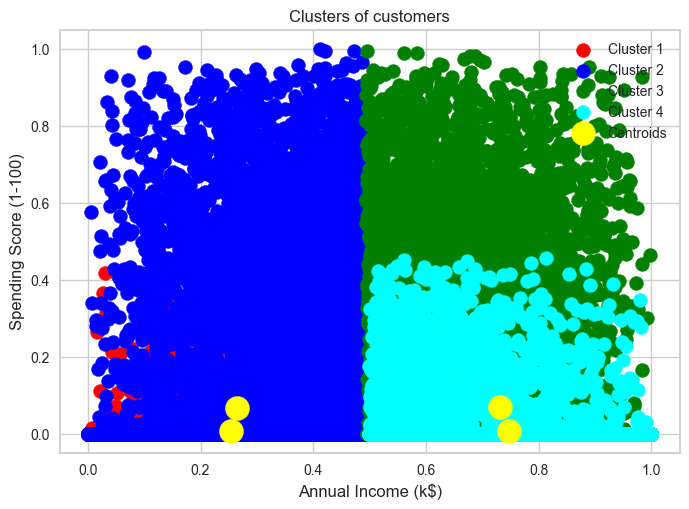

In [47]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Note that, the elbow method is sometimes ambiguous. An alternative is the average silhouette method which can be also used with any clustering approach.

### 9.1.2) The Average Silhouette Method


It measures the quality of a clustering, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990).

https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# Fit the KMeans model
kmeans.fit_predict(X)

# Calculate Silhoutte Score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.342


Text(0.5, 1.0, '4 Clusters')

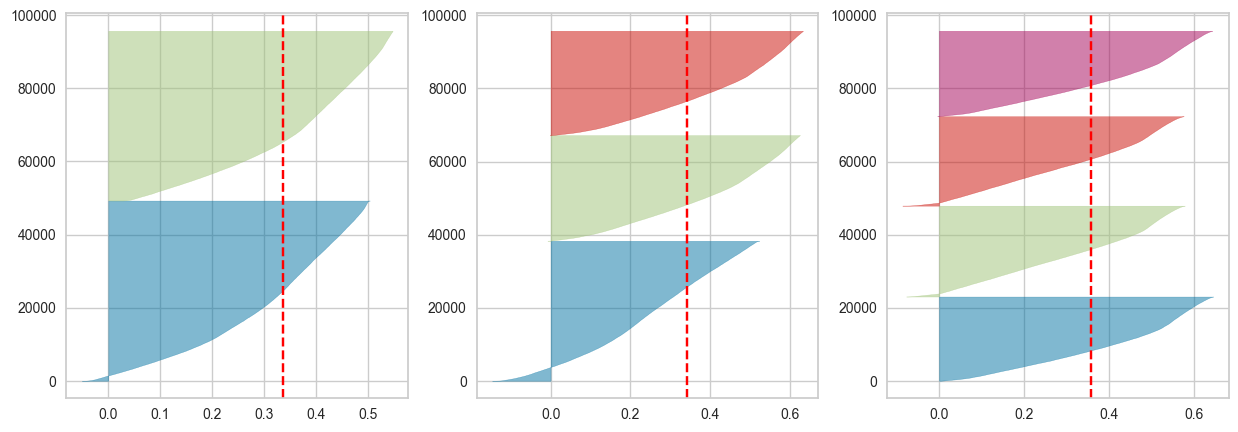

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=42)
SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax[0]).fit(X)
axes[0].set_title('2 Clusters')

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax[1]).fit(X)
axes[1].set_title('3 Clusters')

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=42)
SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax[2]).fit(X)
axes[2].set_title('4 Clusters')

#demora 5 min pra rodar

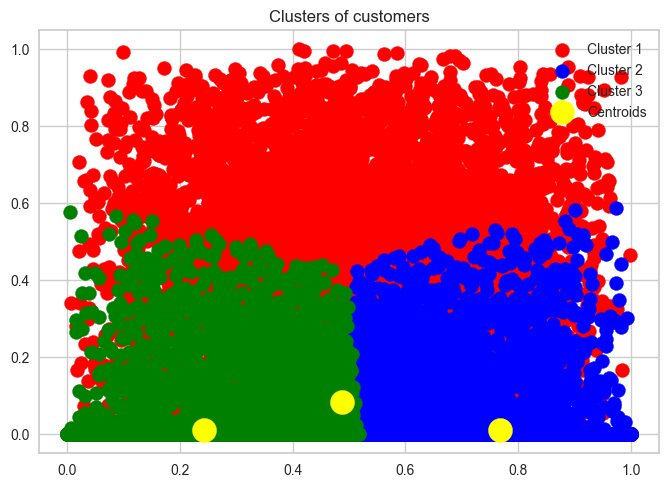

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

# 10) Interpreting the Results

In [50]:
df_clients['cluster'] = kmeans.labels_

### 10.1) Cluster 0

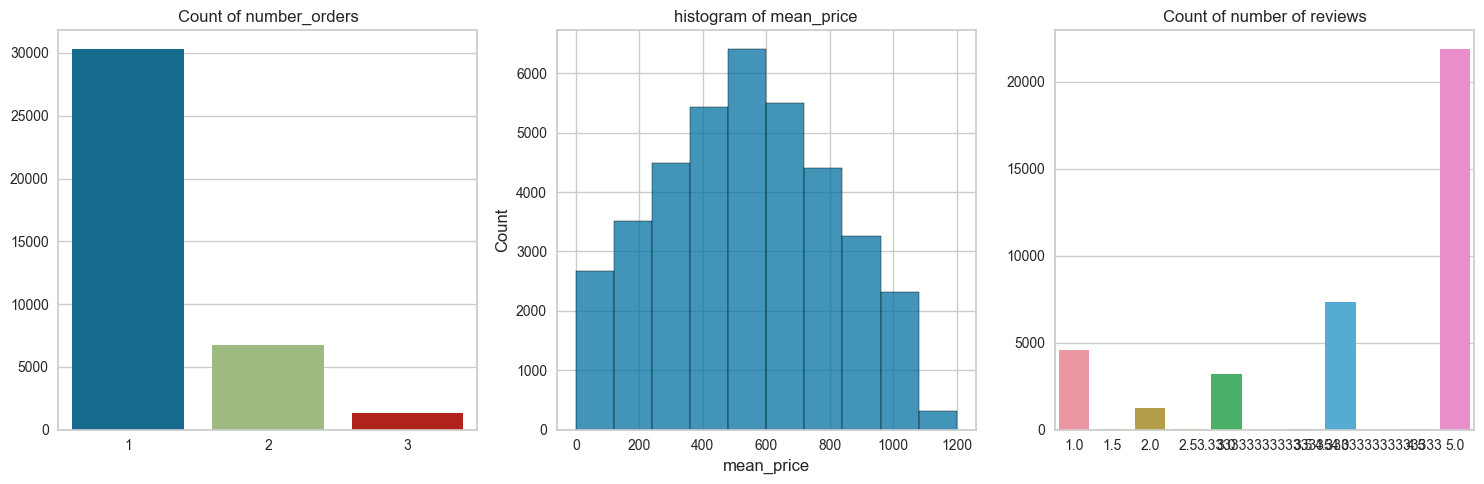

,number_orders,mean_price,sum_price,mean_review,diff_days,interval,recency,is_southeast,cluster
count,38302.000000,38302.000000,38302.000000,38302.000000,38302.000000,38302.000000,38302.000000,38302.000000,38302.0
mean,1.242964,537.619949,669.805068,4.062951,130.152446,60.634869,359.099864,0.688946,0.0
std,0.501245,269.776044,424.956160,1.364327,300.198423,140.375915,176.271450,0.462931,0.0
min,1.000000,1.010000,1.010000,1.000000,0.000000,0.000000,82.000000,0.000000,0.0
25%,1.000000,332.040000,364.642500,4.000000,0.000000,0.000000,210.000000,0.000000,0.0
50%,1.000000,538.175000,614.300000,5.000000,0.000000,0.000000,344.000000,1.000000,0.0
75%,1.000000,737.382500,896.470000,5.000000,0.000000,0.000000,489.000000,1.000000,0.0
max,3.000000,1099.870000,3129.990000,5.000000,1456.000000,728.000000,882.000000,1.000000,0.0


In [82]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Create an aux dataframe
aux = df_clients[df_clients['cluster']==0]['number_orders'].value_counts(normalize=False)
# create bar plot of the percetages of number_orders 
sns.barplot(x=aux.index, y=aux.values, ax = axes[0])
axes[0].set_title('Count of number_orders')

sns.histplot(df_clients[df_clients['cluster']==0], bins = 10, x="mean_price",binrange = (0,1200), ax=axes[1])
axes[1].set_title('histogram of mean_price')

aux2 = df_clients[df_clients['cluster']==0]['mean_review'].value_counts(normalize=False)
sns.barplot(x=aux2.index, y=aux2.values)
axes[2].set_title('Count of number of reviews')

fig.tight_layout()
plt.show()

df_clients[df_clients['cluster']==0].describe()

### 10.2) Cluster 1

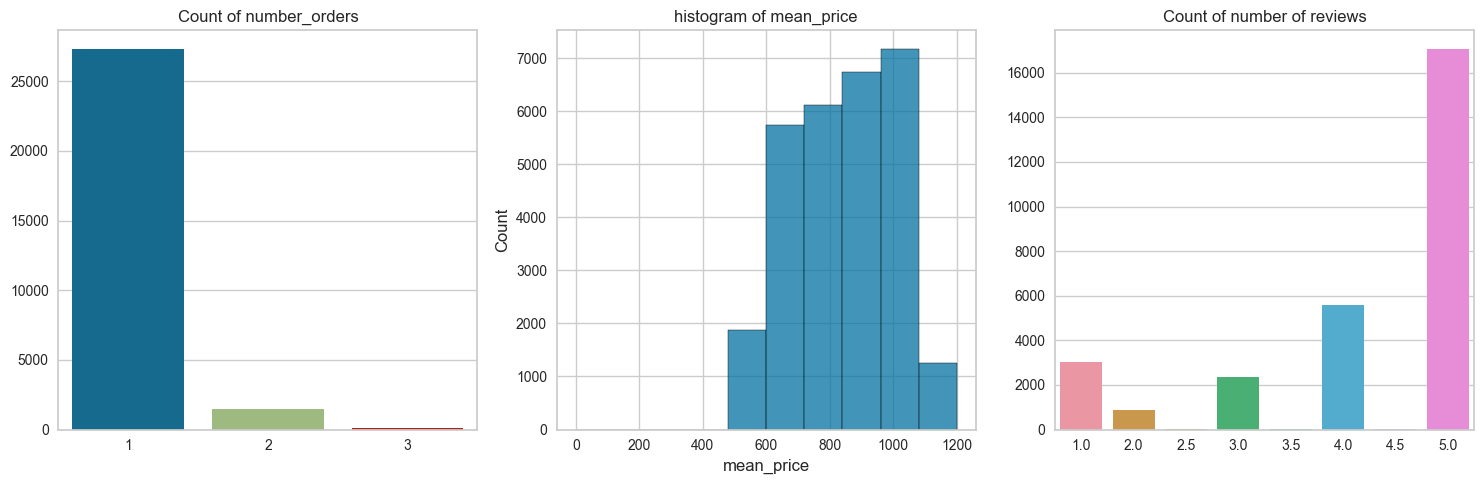

,number_orders,mean_price,sum_price,mean_review,diff_days,interval,recency,is_southeast,cluster
count,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.00000,28906.000000,28906.000000,28906.0
mean,1.060333,844.770681,890.580277,4.132170,15.200789,7.32333,1049.348682,0.683733,1.0
std,0.256301,155.644190,239.190226,1.311761,76.532841,36.89985,285.321227,0.465026,0.0
min,1.000000,549.350000,549.350000,1.000000,0.000000,0.00000,375.000000,0.000000,1.0
25%,1.000000,712.440000,726.840000,4.000000,0.000000,0.00000,826.000000,0.000000,1.0
50%,1.000000,852.880000,875.755000,5.000000,0.000000,0.00000,1049.000000,1.000000,1.0
75%,1.000000,980.877500,1006.645000,5.000000,0.000000,0.00000,1289.000000,1.000000,1.0
max,3.000000,1099.970000,3064.030000,5.000000,885.000000,427.00000,1542.000000,1.000000,1.0


In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Create an aux dataframe
aux = df_clients[df_clients['cluster']==1]['number_orders'].value_counts(normalize=False)
# create bar plot of the percetages of number_orders 
sns.barplot(x=aux.index, y=aux.values, ax = axes[0])
axes[0].set_title('Count of number_orders')

sns.histplot(df_clients[df_clients['cluster']==1], bins = 10, x="mean_price",binrange = (0,1200), ax=axes[1])
axes[1].set_title('histogram of mean_price')

aux2 = df_clients[df_clients['cluster']==1]['mean_review'].value_counts(normalize=False)
sns.barplot(x=aux2.index, y=aux2.values)
axes[2].set_title('Count of number of reviews')

fig.tight_layout()
plt.show()

df_clients[df_clients['cluster']==1].describe()

### 10.3) Cluster 2

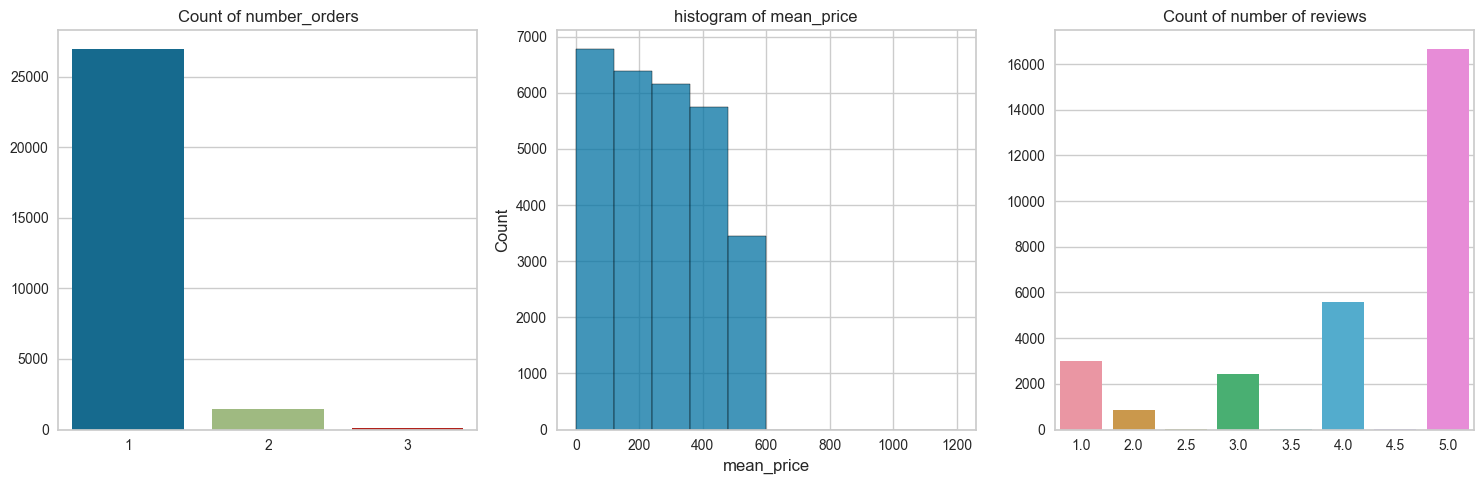

,number_orders,mean_price,sum_price,mean_review,diff_days,interval,recency,is_southeast,cluster
count,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.0
mean,1.059267,266.672402,287.527879,4.121828,14.523868,7.017863,1075.742324,0.684845,2.0
std,0.251648,160.061987,200.913460,1.311571,74.298282,35.875241,272.102551,0.464586,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,445.000000,0.000000,2.0
25%,1.000000,126.642500,127.645000,4.000000,0.000000,0.000000,855.000000,0.000000,2.0
50%,1.000000,259.835000,266.360000,5.000000,0.000000,0.000000,1078.000000,1.000000,2.0
75%,1.000000,403.362500,418.762500,5.000000,0.000000,0.000000,1307.000000,1.000000,2.0
max,3.000000,569.840000,1685.430000,5.000000,840.000000,419.500000,1542.000000,1.000000,2.0


In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Create an aux dataframe
aux = df_clients[df_clients['cluster']==2]['number_orders'].value_counts(normalize=False)
# create bar plot of the percetages of number_orders 
sns.barplot(x=aux.index, y=aux.values, ax = axes[0])
axes[0].set_title('Count of number_orders')

sns.histplot(df_clients[df_clients['cluster']==2], bins = 10, x="mean_price",binrange = (0,1200), ax=axes[1])
axes[1].set_title('histogram of mean_price')

aux2 = df_clients[df_clients['cluster']==2]['mean_review'].value_counts(normalize=False)
sns.barplot(x=aux2.index, y=aux2.values)
axes[2].set_title('Count of number of reviews')

fig.tight_layout()
plt.show()

df_clients[df_clients['cluster']==2].describe()

### 10.4) Cluster Premium

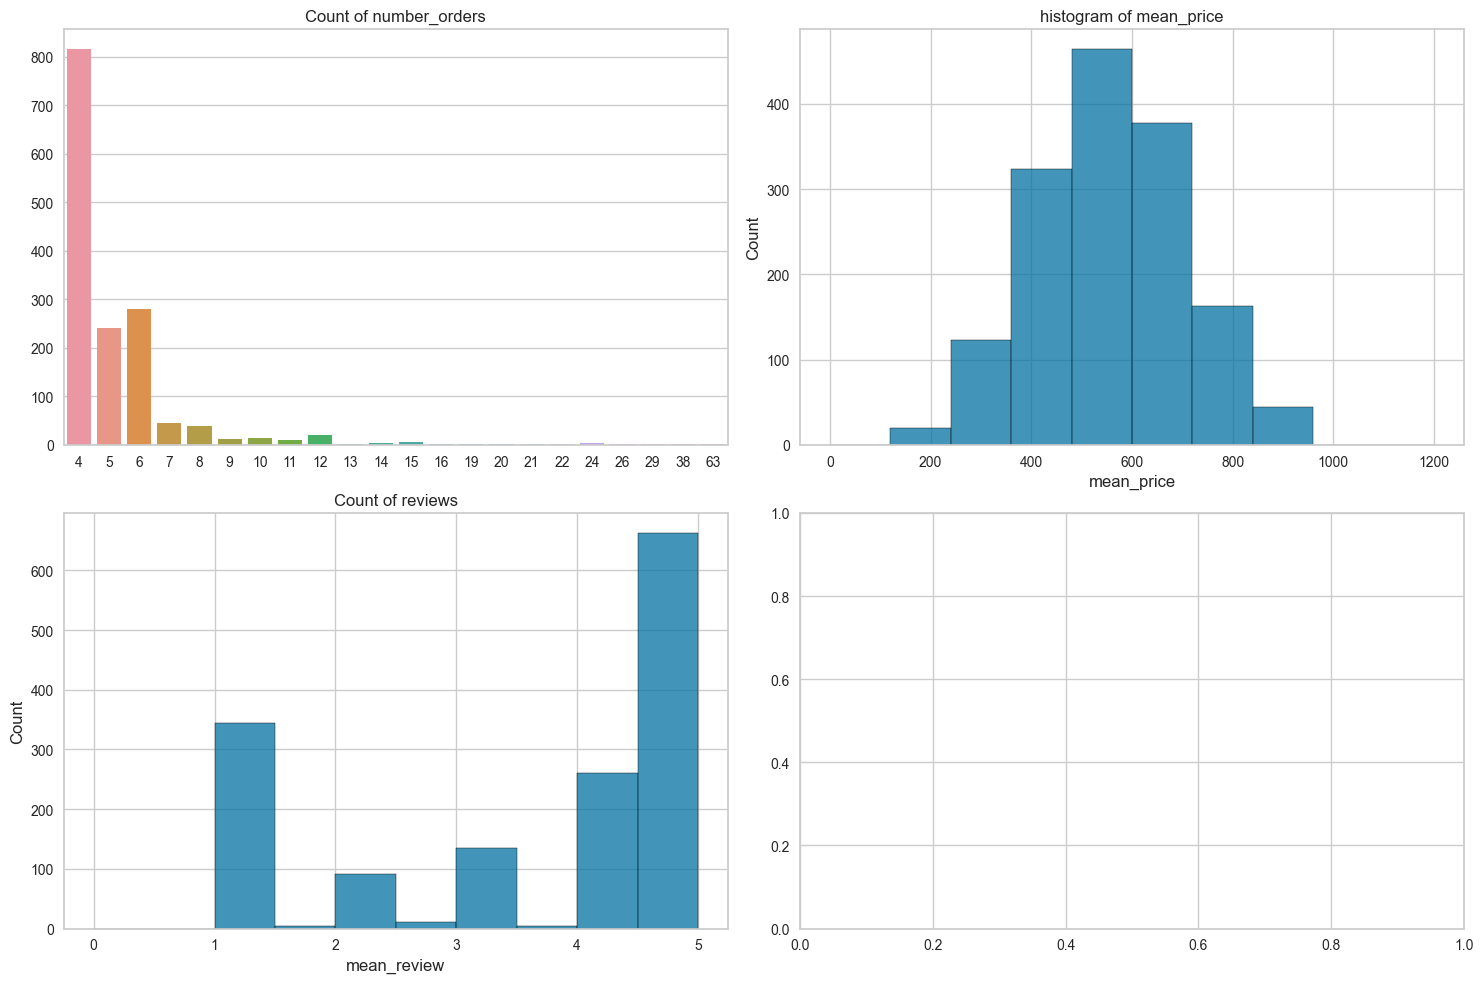

,number_orders,mean_price,sum_price,mean_review,diff_days,interval,recency,is_southeast
count,1515.000000,1515.000000,1515.000000,1515.00000,1515.000000,1515.000000,1515.000000,1515.000000
mean,5.346535,557.098533,2973.778706,3.52295,963.176238,196.627538,329.547195,0.699670
std,3.075779,146.561318,1823.827259,1.61920,282.498456,68.477248,219.501033,0.458553
min,4.000000,122.948000,614.740000,1.00000,115.000000,22.840000,82.000000,0.000000
25%,4.000000,455.834583,2038.390000,2.00000,770.000000,148.290000,158.000000,0.000000
50%,4.000000,553.930000,2645.370000,4.00000,990.000000,192.200000,267.000000,1.000000
75%,6.000000,659.599750,3361.650000,5.00000,1194.500000,243.750000,446.000000,1.000000
max,63.000000,946.217500,34558.230000,5.00000,1443.000000,357.500000,1386.000000,1.000000


In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#Create an aux dataframe
aux = df_premium['number_orders'].value_counts(normalize=False)
# create bar plot of the percetages of number_orders 
sns.barplot(x=aux.index, y=aux.values, ax = axes[0,0])
axes[0,0].set_title('Count of number_orders')

sns.histplot(df_premium, bins = 10, x="mean_price",binrange = (0,1200), ax=axes[0,1])
axes[0,1].set_title('histogram of mean_price')

sns.histplot(df_premium, bins = 10, x="mean_review",binrange = (0,5), ax=axes[1,0])
axes[1,0].set_title('Count of reviews')

fig.tight_layout()
plt.show()

df_premium.describe()